In [27]:
from graphviz import Digraph
from collections import deque


```python
s = 'sdfkjananablskdfjlaskdanajfoiuranwelnankjs'

d = ['ananab', 'ana', 'an', 'nan']

n = len(s)
k = sum(len(w) for w in d)

O(n + k)
```

In [73]:
class Node:
    def __init__(self, order_num):
        self.order_num = order_num
        self.children = {}  # Dict[str, Node]
        self.terminal = None
        self.suffix = None
        self.depth = 0
    
    def __repr__(self):
        return f"{self.order_num} -> {[element.order_num for element in self.children.values()]} {self.terminal}"
    
    def render_graph(self, d):
        d.node(str(self.order_num), label=f"{self.order_num} {'*' if self.terminal else ''} {self.depth}", rank=str(self.depth))
        d.edge(str(self.order_num), str(self.suffix.order_num), style = 'dashed', Damping="0")  #
        for c, child in self.children.items():
            d.edge(str(self.order_num), str(child.order_num), label=f"{c}")
            child.render_graph(d)

In [74]:
def build(words):
    meter = 0
    root = Node(meter)
    meter += 1
    for current_word in words:
        current_node = root
        for current_char in current_word:
            if current_char not in current_node.children:
                current_node.children[current_char] = Node(meter)
                meter += 1
            current_node = current_node.children[current_char]
        current_node.terminal = len(current_word)
        
    root.suffix = root
    todo = deque([root])
    while todo:
        current = todo.popleft()
        for c, child in current.children.items():
            cand = current.suffix
            while cand != root and c not in cand.children:
                cand = cand.suffix
            if current != root and c in cand.children:
                child.suffix = cand.children[c]
            else:
                child.suffix = root
            child.depth = current.depth + 1
            todo.append(child)
            
    return root

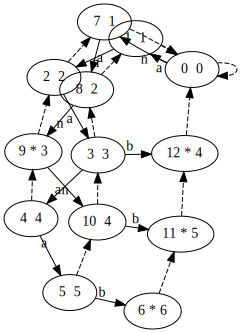

In [75]:
t = build(['ananab', 'nanab', 'anab', 'nan'])# ['ananab', 'ana', 'nan', 'an'])    ['abc', 'bc', 'c']  
 
d = Digraph(engine='neato')

t.render_graph(d)

d

In [7]:
s1 = 'sdfkjananablskdfjlaskdanajfoiuranwelnankjs'
s2 = 'ana'  # trie   (tree)

```
abcdefghijklmnopqrstuvwxyz

abcdefg1
b
```